In [1]:
import pandas as pd
import numpy as np
import gc

from scipy import stats
from matplotlib import pyplot as plt

In [2]:
def csv_read(p_path,header_is=0):
    pd_data=pd.read_csv(p_path, sep=',',header=header_is)
    column_names=pd_data.columns.values.tolist()
    print(column_names)
    return pd_data,np.array(pd_data),column_names

#-------------------------------------------------------------------------------------
def write_to_csv(p_data,p_path):
    dataframe = pd.DataFrame(p_data)
    dataframe.to_csv(p_path, mode='a',header=False,index=False,sep=',')
    del dataframe
    gc.collect()
    
#-------------------------------------------------------------------------------------
def bar_figure(group1,group2,y_label):
    figure,axes=plt.subplots()
    
    axes.boxplot([group1,group2],patch_artist=True)
    plt.xticks(range(1,3),['Group 1','Group 2'])
    #plt.yticks(fontsize = 20)
    
    min_end=min(np.min(group1),np.min(group2))
    max_end=max(np.max(group1),np.max(group2))
    end=(max_end-min_end)/10
    plt.ylim(min_end-end,max_end+end)
    plt.ylabel(y_label)
    plt.show()

#-------------------------------------------------------------------------------------
def statistic_analysis(group1, group2):
    var_same=stats.levene(group1, group2)
    
    print("\n")
    print("-"*80)
    
    print("var_same",var_same)

    if var_same[1]>0.05:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=True)
        print("Test: f_t, p_value_t", format(f_t,'.3E'), format(p_value_t,'.3E'))
    else:
        f_t, p_value_t = stats.ttest_ind(group1, group2, equal_var=False)
        print("Test: f_t, p_value_t",format(f_t,'.3E'), format(p_value_t,'.3E'))
    
    f, p_value = stats.f_oneway(group1, group2)
    print("ANOVA: f, p_value:",format(f,'.3E'), format(p_value_t,'.3E'))
    print("-"*80)
    print("\n")

In [3]:
data,data_arr,column_names=csv_read('./data/survival_data_filtered_3.csv')
column_names_arr=np.array(column_names)

FS_data,FS_data_arr,_=csv_read('./feature_selection.csv',header_is=None)

['NACCREAS', 'NACCREFR', 'BIRTHMO', 'BIRTHYR', 'SEX', 'HISPANIC', 'HISPOR', 'RACE', 'RACESEC', 'RACETER', 'PRIMLANG', 'EDUC', 'MARISTAT', 'NACCLIVS', 'INDEPEND', 'RESIDENC', 'HANDED', 'NACCFADM', 'NACCFFTD', 'MEMORY', 'ORIENT', 'JUDGMENT', 'COMMUN', 'HOMEHOBB', 'PERSCARE', 'CDRSUM', 'DECSUB', 'DECIN', 'COGMEM', 'COGJUDG', 'COGLANG', 'COGVIS', 'COGATTN', 'COGOTHR', 'NACCCOGF', 'COGMODE', 'DECAGE', 'BEAPATHY', 'BEDEP', 'BEVHALL', 'BEAHALL', 'BEDEL', 'BEDISIN', 'BEIRRIT', 'BEAGIT', 'BEPERCH', 'BEOTHR', 'NACCBEHF', 'BEMODE', 'MOGAIT', 'MOFALLS', 'MOTREM', 'MOSLOW', 'NACCMOTF', 'MOMODE', 'COURSE', 'FRSTCHG', 'NORMCOG', 'DEMENTED', 'NACCPPA', 'NACCBVFT', 'NACCLBDS', 'NACCTMCI', 'NACCMCIL', 'NACCMCIA', 'NACCMCIE', 'NACCMCIV', 'NACCMCII', 'IMPNOMCI', 'NACCALZD', 'NACCALZP', 'NACCLBDE', 'NACCLBDP', 'PARK', 'PSP', 'PSPIF', 'CORT', 'CORTIF', 'DOWNS', 'DOWNSIF', 'HUNT', 'HUNTIF', 'PRION', 'PRIONIF', 'BRNINJ', 'BRNINJIF', 'HYCEPH', 'HYCEPHIF', 'NEOP', 'NEOPIF', 'DEP', 'DEPIF', 'OTHPSY', 'OTHPSYIF',

In [4]:
used_number_features=10
FS_data_used=FS_data_arr[-1,0:used_number_features]

Feature:  NACCAGEB


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=5.966684695280776, pvalue=0.015043221823329731)
Test: f_t, p_value_t -1.985E+00 4.794E-02
ANOVA: f, p_value: 3.756E+00 4.794E-02
--------------------------------------------------------------------------------


Group1:  [67 73 60 75 76 71 64 29 72 72 60 89 51 75 70 66 59 85 63 91 72 71 66 66
 70 59 71 71 47 73 67 64 72 69 85 73 59 63 63 73 54 72 58 56 77 68 54 80
 57 65 66 72 66 75 76 78 71 66 77 63 60 62 81 63 75 65 67 68 64 68 66 78
 62 56 77 58 70 92 60 75 58 64 76 59 82 68 58 68 63 78 56 45 57 63 68 62
 65 55 80 85 54 75 49 56 53 69 58 69 70 64 83 64 80 66 68 63 76 57 68 68
 62 68 71 79 65 55 78 54 63 84 62 77 80 64 54 90 79 76 61 77 62 85 61 70
 74 76 81 62 76 80 68 72 70 85 54 65 73 52 60 80 57 79 67]


Group2:  [79 82 60 58 76 59 49 77 71 86 67 74 62 61 69 50 80 61 37 83 61 74 68 83
 61 65 101 84 53 76 57 78 67 65 75 57 61 88 65 75 86 58 57 82 70

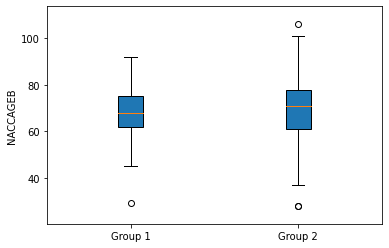

************************************************************************************************************************




Feature:  NACCPPA


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=1.1076540318777732, pvalue=0.2932756243569891)
Test: f_t, p_value_t -1.052E+00 2.933E-01
ANOVA: f, p_value: 1.108E+00 2.933E-01
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Group2:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 1 1 0 

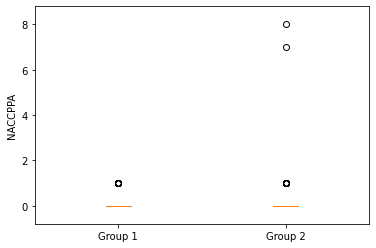

************************************************************************************************************************




Feature:  NACCIDEM


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=5.851836614640254, pvalue=0.016039870256227766)
Test: f_t, p_value_t 2.482E+00 1.350E-02
ANOVA: f, p_value: 5.852E+00 1.350E-02
--------------------------------------------------------------------------------


Group1:  [8 8 8 8 1 8 8 1 8 8 8 8 8 8 8 8 8 8 8 1 1 1 8 8 8 8 8 8 8 8 8 8 8 8 8 1 8
 8 8 8 8 1 8 8 8 1 8 8 8 8 1 8 8 8 8 1 8 8 8 8 8 8 8 8 8 8 8 1 8 8 8 1 8 8
 8 8 8 8 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8 8 8 8 1 8 8 1 8 8
 8 8 8 1 8 1 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 0 8 1 8 8 8 8 8 8 8 8 8 8
 1 1 8 8 8 8 8 8 8 8 8 1 8 8 8]


Group2:  [8 1 8 8 8 8 8 8 8 1 8 1 8 8 8 8 8 1 8 8 1 8 8 1 8 8 8 8 8 8 8 8 8 1 8 8 8
 1 8 1 1 8 8 8 1 8 8 1 8 8 8 8 8 8 1 8 8 8 8 8 8 8 8 8 0 8 8 8 8 8 8 8 8 8
 8 1 1 8 8 8 8 8 8 1 8 8 8 8

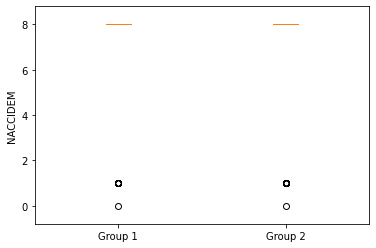

************************************************************************************************************************




Feature:  NACCAGE


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=7.313593509160766, pvalue=0.007157883390518168)
Test: f_t, p_value_t -1.325E+00 1.860E-01
ANOVA: f, p_value: 1.679E+00 1.860E-01
--------------------------------------------------------------------------------


Group1:  [72 79 62 76 81 75 71 37 74 78 62 94 53 77 71 69 60 89 67 98 86 82 68 67
 76 64 80 77 52 74 70 71 73 73 90 83 63 64 72 75 56 77 64 58 82 71 56 87
 61 69 72 74 78 82 78 86 78 68 81 65 62 68 86 66 84 67 70 73 67 71 72 90
 70 62 83 59 77 97 69 77 60 75 79 64 86 72 60 73 67 87 61 47 62 70 73 62
 68 58 84 93 59 77 54 60 58 75 60 73 76 72 92 68 83 67 80 68 87 60 70 70
 69 72 72 84 67 56 84 61 67 87 64 78 84 65 56 97 82 80 62 82 64 94 66 73
 75 77 84 64 79 90 74 75 73 87 57 69 75 56 64 84 66 83 70]


Group2:  [86 92 60 59 

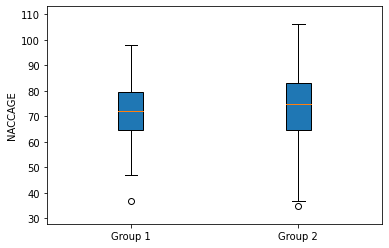

************************************************************************************************************************




Feature:  HANDED


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=0.20988137307377494, pvalue=0.6471278943737323)
Test: f_t, p_value_t -1.393E+00 1.644E-01
ANOVA: f, p_value: 1.941E+00 1.644E-01
--------------------------------------------------------------------------------


Group1:  [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 1 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 3 1 2 2 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


Group2:  [1 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 1 2 2 2 3 2 2
 2 2 2 1 2 3 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

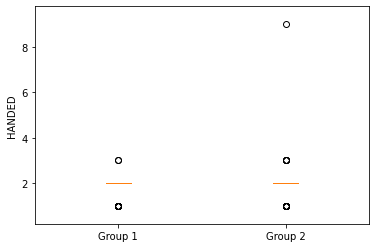

************************************************************************************************************************




Feature:  JUDGMENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=52.81072599821235, pvalue=2.177278697679409e-12)
Test: f_t, p_value_t 2.007E+01 3.610E-59
ANOVA: f, p_value: 3.475E+02 3.610E-59
--------------------------------------------------------------------------------


Group1:  [3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 1.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0
 3.0 3.0 3.0 2.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 

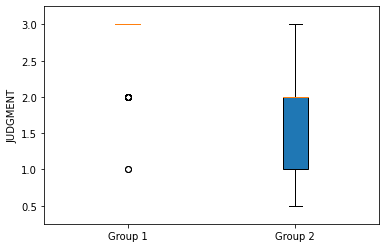

************************************************************************************************************************




Feature:  NACCMCII


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=3.839183103390661, pvalue=0.050814361288327885)
Test: f_t, p_value_t -1.959E+00 5.081E-02
ANOVA: f, p_value: 3.839E+00 5.081E-02
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 8 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 8 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


Group2:  [0 8 0 0 0 0 0 0 0 0 0 8 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 8 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 

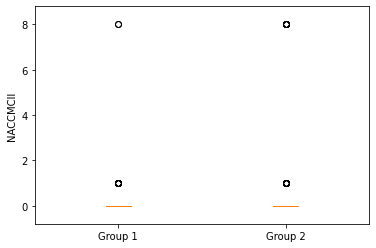

************************************************************************************************************************




Feature:  NACCOTHP


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=7.843370336555438, pvalue=0.005367029464365173)
Test: f_t, p_value_t -2.908E+00 3.851E-03
ANOVA: f, p_value: 7.843E+00 3.851E-03
--------------------------------------------------------------------------------


Group1:  [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]


Group2:  [0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 1 1 0 0 0 0 

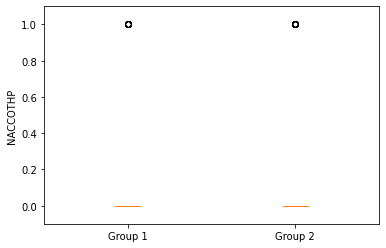

************************************************************************************************************************




Feature:  BEAPATHY


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=2.0198331996828913, pvalue=0.15609392404400094)
Test: f_t, p_value_t 2.852E+00 4.582E-03
ANOVA: f, p_value: 8.136E+00 4.582E-03
--------------------------------------------------------------------------------


Group1:  [0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0
 0 1 0 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0
 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1
 1 9 1 1 0 1 1 1 1 1 0 1 1 1 1]


Group2:  [0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0
 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0
 1 0 0 0 1 1 1 1 0 0 0 0 0 1

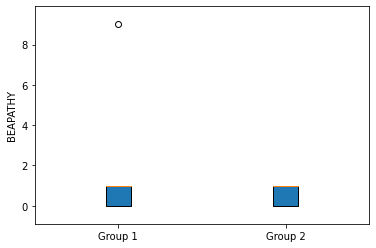

************************************************************************************************************************




Feature:  ORIENT


--------------------------------------------------------------------------------
var_same LeveneResult(statistic=14.163803203457817, pvalue=0.0001946327726104688)
Test: f_t, p_value_t 1.867E+01 2.278E-55
ANOVA: f, p_value: 3.271E+02 2.278E-55
--------------------------------------------------------------------------------


Group1:  [3.0 2.0 3.0 3.0 3.0 2.0 3.0 2.0 2.0 3.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0
 3.0 3.0 3.0 2.0 3.0 3.0 2.0 3.0 3.0 1.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 2.0 2.0 2.0
 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 1.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0
 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 1.0 3.0 3.0 3.0
 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 2.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0 3.0
 3.0 2.0 3

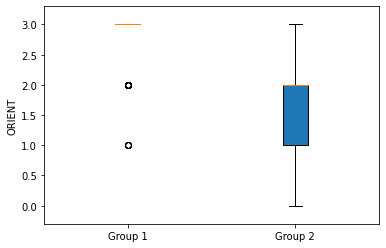

************************************************************************************************************************






In [5]:
group1_index=np.where(data_arr[:,-1]==True)[0]
group2_index=np.where(data_arr[:,-1]==False)[0]

for i in np.arange(used_number_features):
    feature_name=FS_data_used[i]
    
    print("Feature: ",feature_name)
    
    
    index_i=np.where(column_names_arr==feature_name)[0][0]
    get_data_i=data_arr[:,index_i]
    
    group1_data=get_data_i[group1_index]
    group2_data=get_data_i[group2_index]
    
    statistic_analysis(group1_data, group2_data)
    
    print("Group1: ",group1_data)
    print("\n")
    print("Group2: ",group2_data)
    print("\n")
    print("Mean: ",np.mean(group1_data),np.mean(group2_data))
    
    bar_figure(group1_data,group2_data,feature_name)
    
    print("*"*120)
    print("\n\n\n")